In [1]:
#%%
from datasets import load_dataset
data = load_dataset("../../NLP_yahoo_questions/tools/yahoo_answers_topics/yahoo_answers_topics.py")
# %%


Found cached dataset yahoo_answers_topics (/Users/wangchunfeng/.cache/huggingface/datasets/yahoo_answers_topics/yahoo_answers_topics/1.0.0/0edb353eefe79d9245d7bd7cac5ae6af19530439da520d6dde1c206ee38f4439)


  0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

from wordcloud import WordCloud

# define the stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))


from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import random

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangchunfeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangchunfeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wangchunfeng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df_train = data['train'].to_pandas()
df_test = data['test'].to_pandas()

In [4]:
df_train.head()

,id,topic,question_title,question_content,best_answer
0,0,4,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,1,5,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,2,2,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...
3,3,6,How many planes Fedex has?,I heard that it is the largest airline in the ...,according to the www.fedex.com web site:\nAir ...
4,4,6,"In the san francisco bay area, does it make se...",the prices of rent and the price of buying doe...,renting vs buying depends on your goals. <br /...


In [5]:
# Converting integers to strings to understand each label independently.
categories = {0: 'Society & Culture', 1: 'Science & Mathematics', 2: 'Health', 3: 'Education & Reference',
              4: 'Computers & Internet', 5: 'Sports', 6: 'Business & Finance', 7: 'Entertainment & Music',
              8: 'Family & Relationships', 9: 'Politics & Government'}

In [6]:
# Mapping dict to target
df_train['topic_name'] = df_train['topic'].map(categories)
df_train.head(3) 

,id,topic,question_title,question_content,best_answer,topic_name
0,0,4,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...,Computers & Internet
1,1,5,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...,Sports
2,2,2,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...,Health


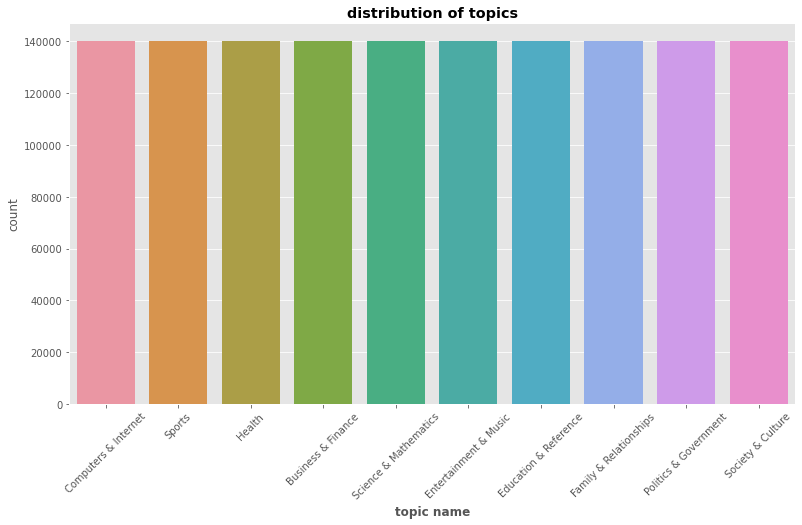

In [7]:
# Topic distribution 
plt.figure(figsize=(13, 7)) 
plt.style.use('ggplot')
sns.countplot(x = 'topic_name', data = df_train)
plt.title('distribution of topics', fontweight='bold')
plt.xlabel('topic name', fontweight='bold')
plt.xticks(rotation=45); 

1.there are no null values

2.topics are equally distributed

3.since it's balanced, no need to do oversampling

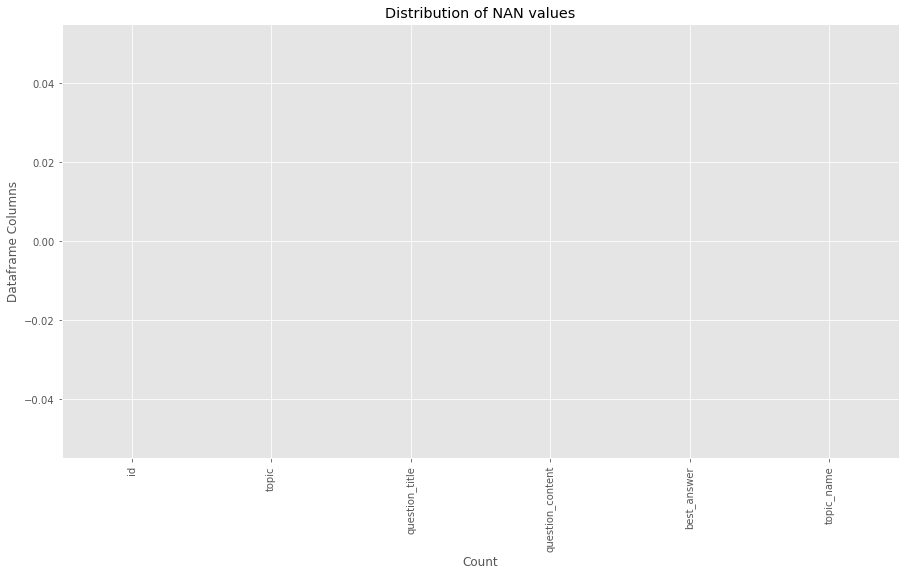

Missing data of training set
id                  0
topic               0
question_title      0
question_content    0
best_answer         0
topic_name          0
dtype: int64


Missing data of test set
id                  0
topic               0
question_title      0
question_content    0
best_answer         0
dtype: int64


In [8]:
# Exploring NaN values in dataset
fig = plt.figure(figsize=(15, 8))
plt.title("Distribution of NAN values")
plt.xlabel('Count')
plt.ylabel('Dataframe Columns') 
df_train.isna().sum().sort_values(ascending = True).plot(kind = 'bar')
plt.show();

print("Missing data of training set")
print(df_train.isna().sum())
print("\n")
print("Missing data of test set")
print(df_test.isna().sum())

Insights from chart above: no data is missing

## preprocessing

In [9]:
def preprocess_text(text):
    text = text.replace('\\n',' ').replace('<br />','')
    # tokenize the text into words
    tokens = nltk.word_tokenize(text.lower())
    # remove stopwords and punctuation
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    # perform stemming
    ##stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    # join the stemmed tokens back into a string
    ##preprocessed_text = ' '.join(stemmed_tokens)
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text.replace('[^\w\s]', '')

In [10]:
df_train['title_clean'] = df_train['question_title'].apply(preprocess_text)

In [11]:
df_train['content_clean'] = df_train['question_content'].apply(preprocess_text)

In [12]:
df_train['answer_clean'] = df_train['best_answer'].apply(preprocess_text)

In [13]:
df_train['text_clean'] = df_train['title_clean'] + ' ' + df_train['content_clean'] + ' ' + df_train['answer_clean']

## word cloud

In [14]:
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='viridis', max_words=50)

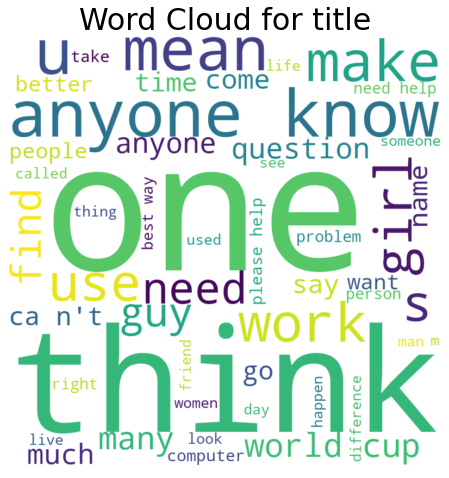

In [15]:
wordcloud_title = ' '.join(df_train['title_clean'])
wordcloud.generate(wordcloud_title)
# Plot the word cloud with a title
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for title', fontsize=30)
plt.show()

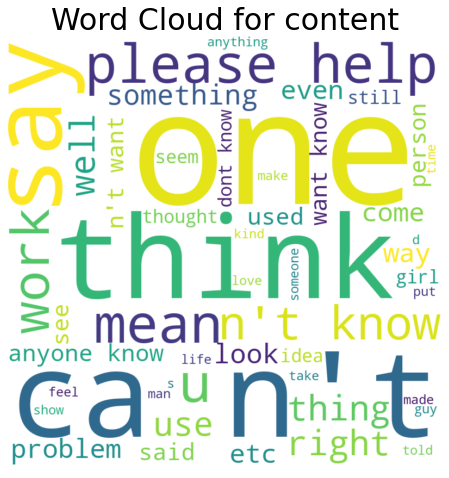

In [16]:
wordcloud_content = ' '.join(df_train['content_clean'])
wordcloud.generate(wordcloud_content)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for content', fontsize=30)
plt.show()

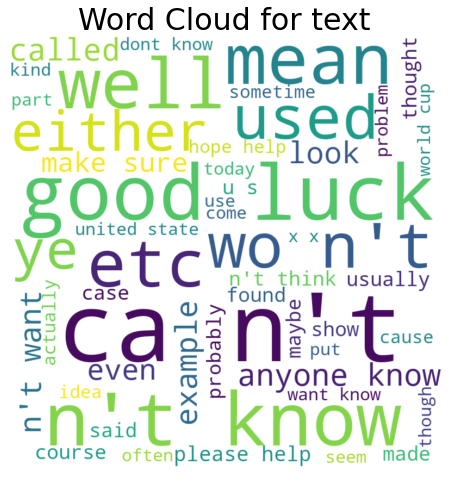

In [18]:
wordcloud_text = ' '.join(df_train['text_clean'])
wordcloud.generate(wordcloud_text)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for text', fontsize=30)
plt.show()